Importing the libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Exploratory Data Analysis and Data Visualization

In [3]:
df.shape

(7752, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [6]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df.fillna(df.mean(), inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

Missing Values:
 station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


In [7]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [8]:
numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

categorical_columns = ['station', 'Date']
df[categorical_columns] = df[categorical_columns].fillna(method='ffill')

missing_values = df.isnull().sum()
print("Remaining Missing Values:\n", missing_values)

Remaining Missing Values:
 station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

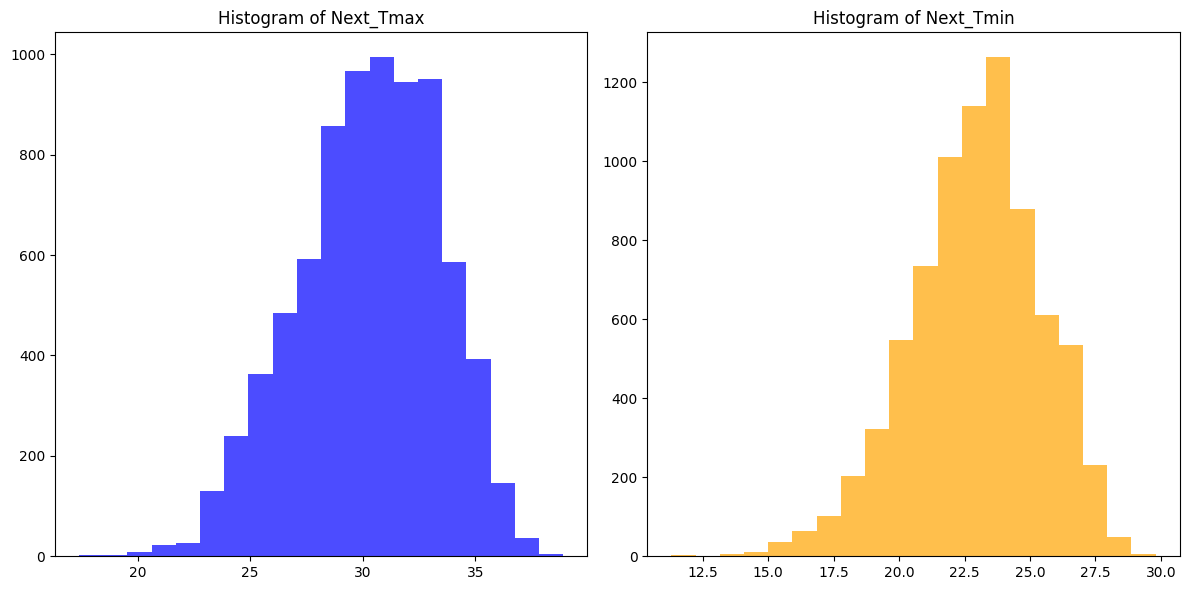

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Next_Tmax'], bins=20, color='blue', alpha=0.7)
plt.title("Histogram of Next_Tmax")
plt.subplot(1, 2, 2)
plt.hist(df['Next_Tmin'], bins=20, color='orange', alpha=0.7)
plt.title("Histogram of Next_Tmin")
plt.tight_layout()
plt.show()

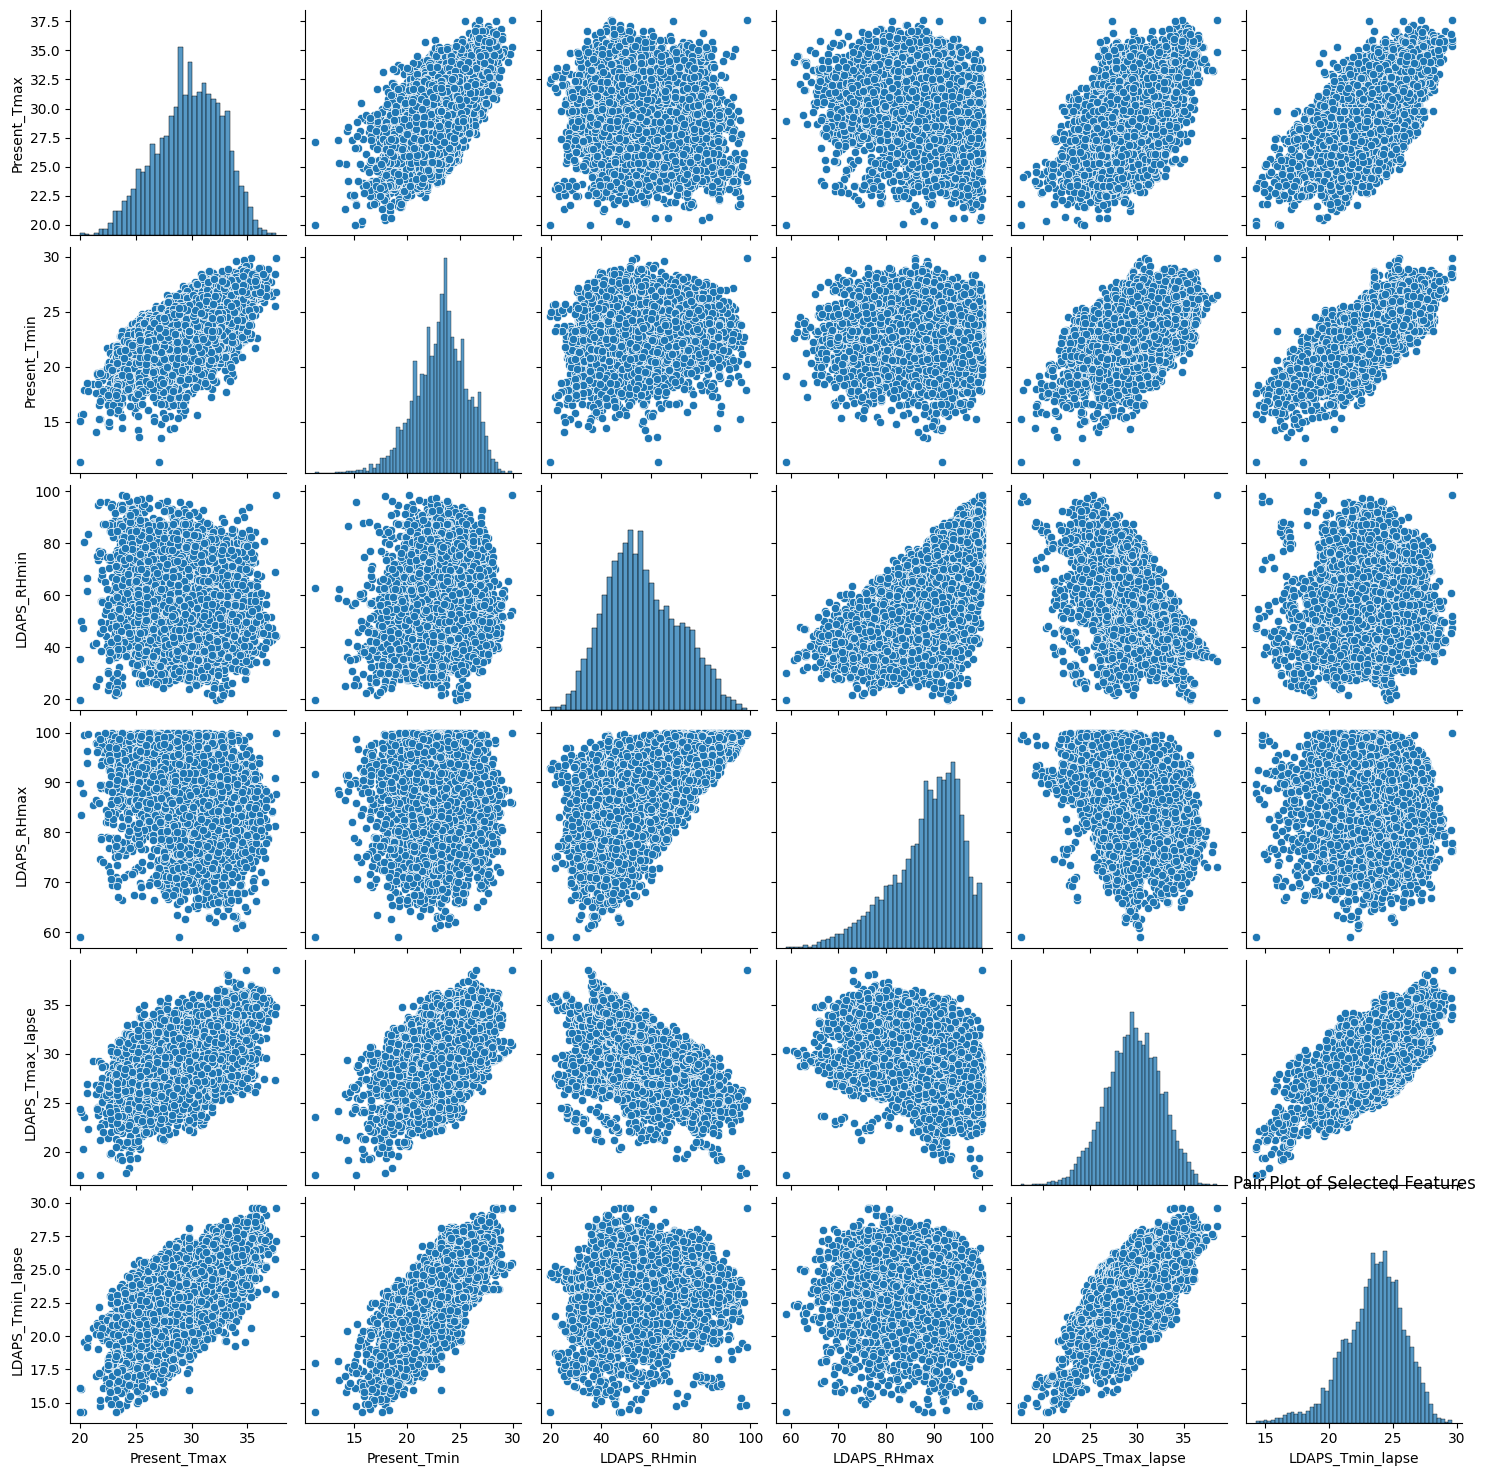

In [11]:
selected_features = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']
sb.pairplot(df[selected_features])
plt.title("Pair Plot of Selected Features")
plt.show()

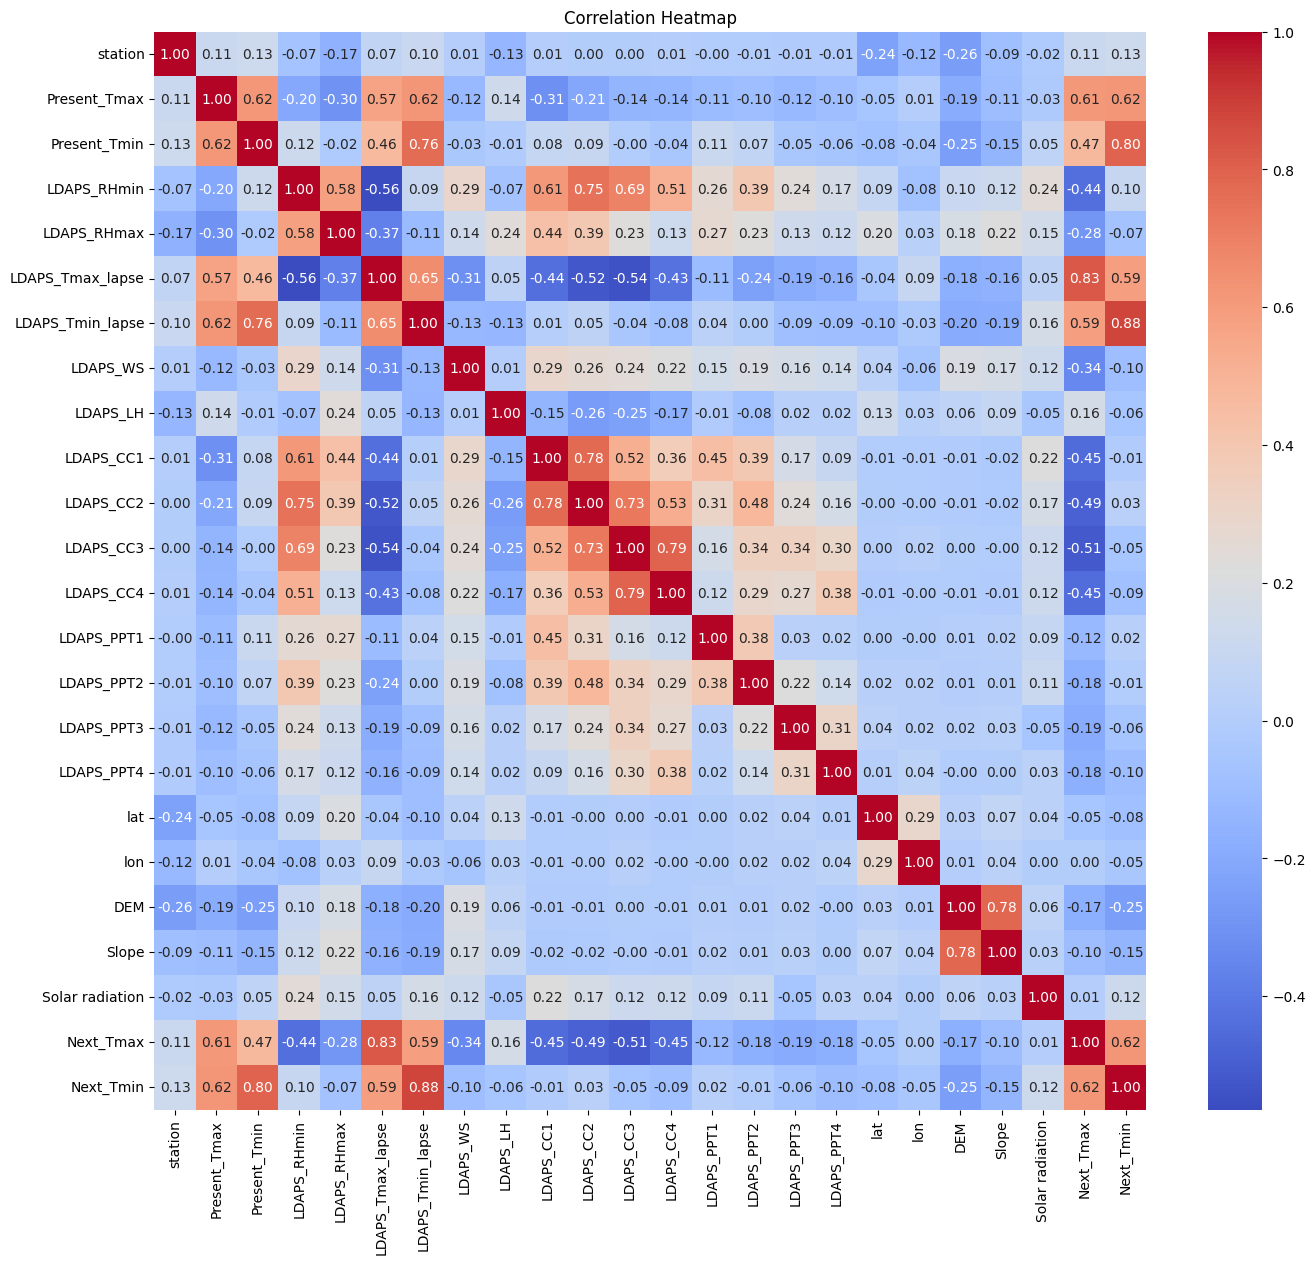

In [12]:
plt.figure(figsize=(16,14))
corr_matrix = df.corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

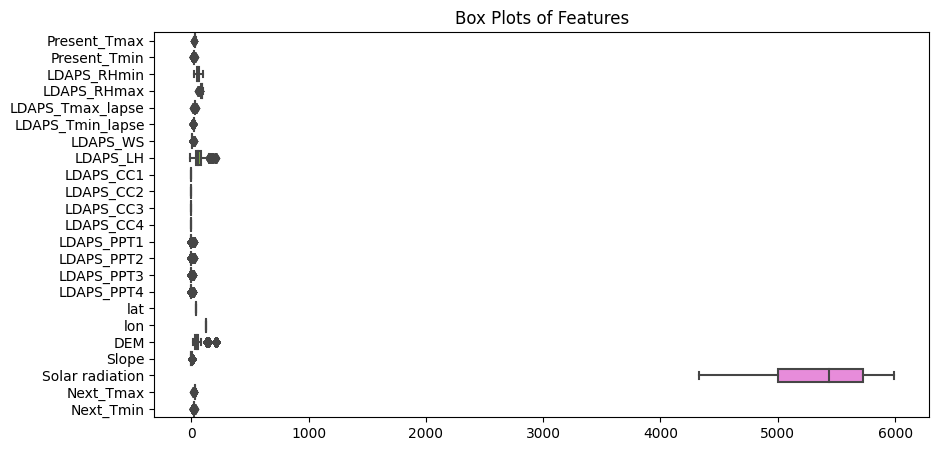

In [13]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=df.drop(['station', 'Date'], axis=1), orient='h')
plt.title("Box Plots of Features")
plt.show()

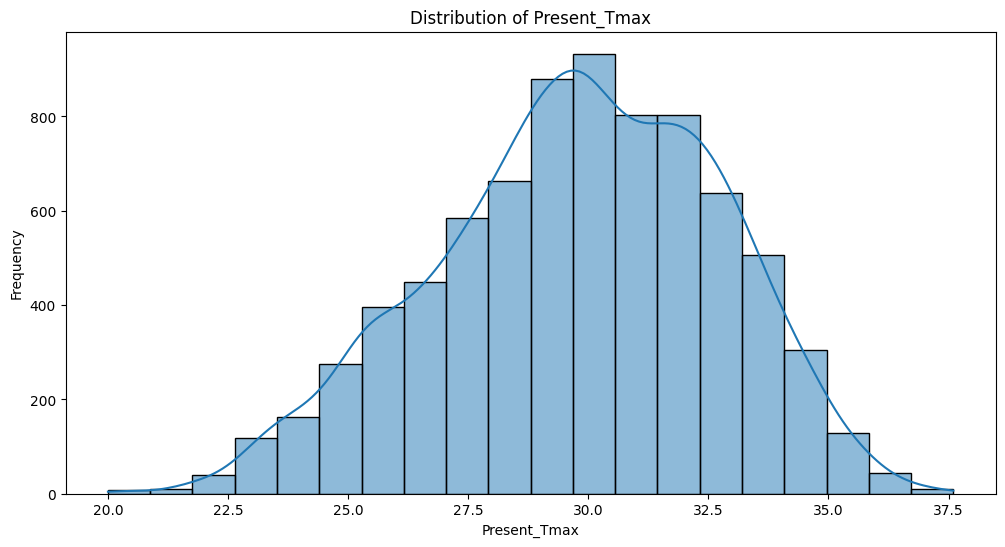

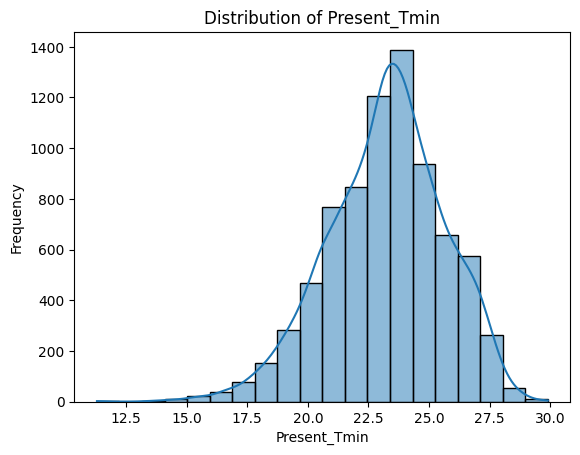

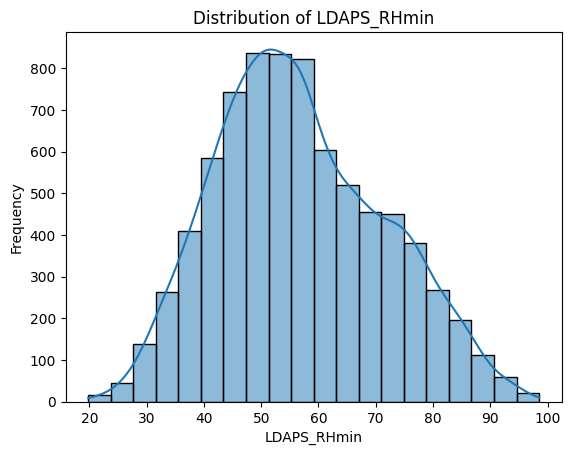

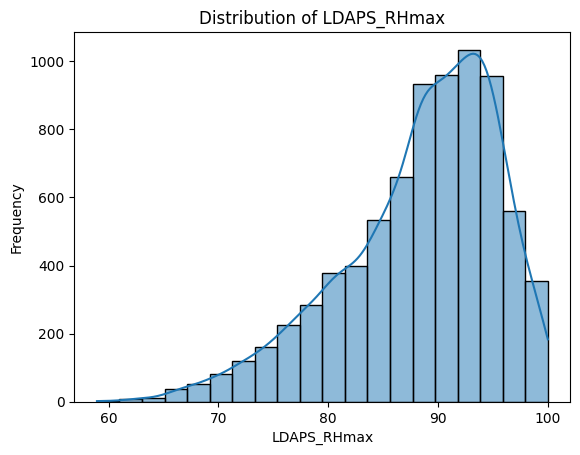

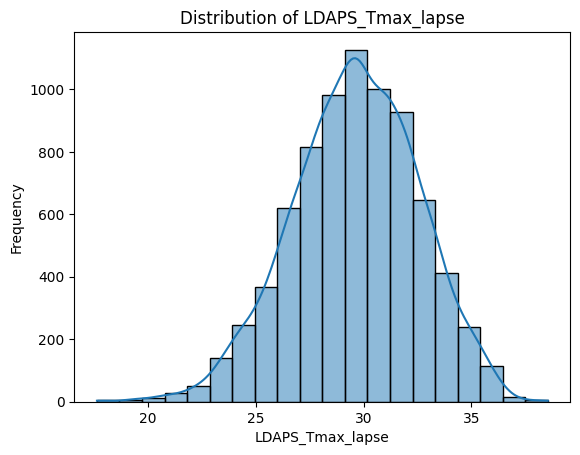

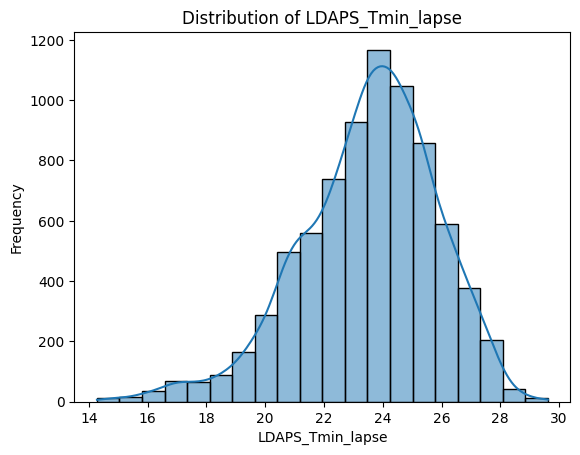

In [14]:
selected_features_for_dist = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
                              'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']
plt.figure(figsize=(12, 6))
for feature in selected_features_for_dist:
    sb.histplot(df[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

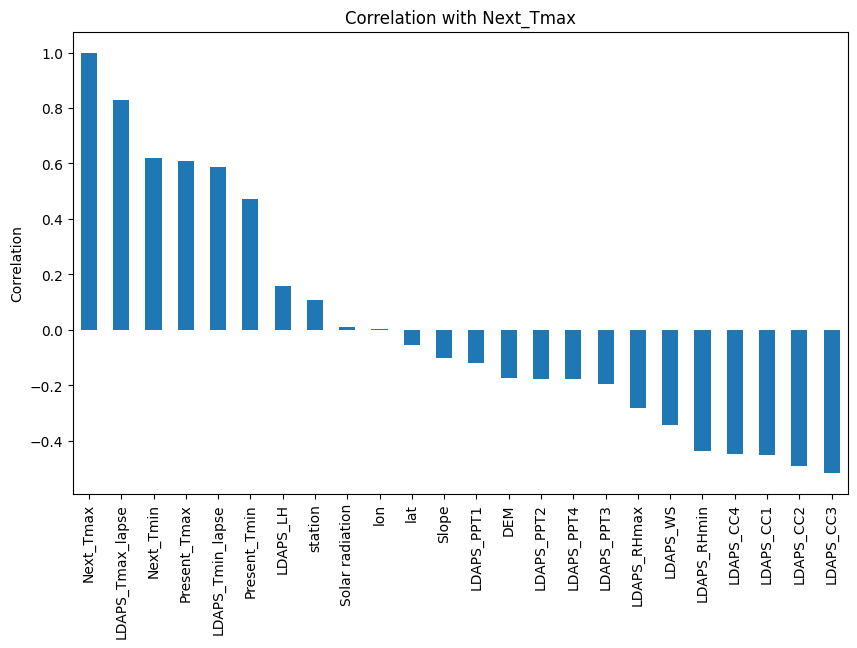

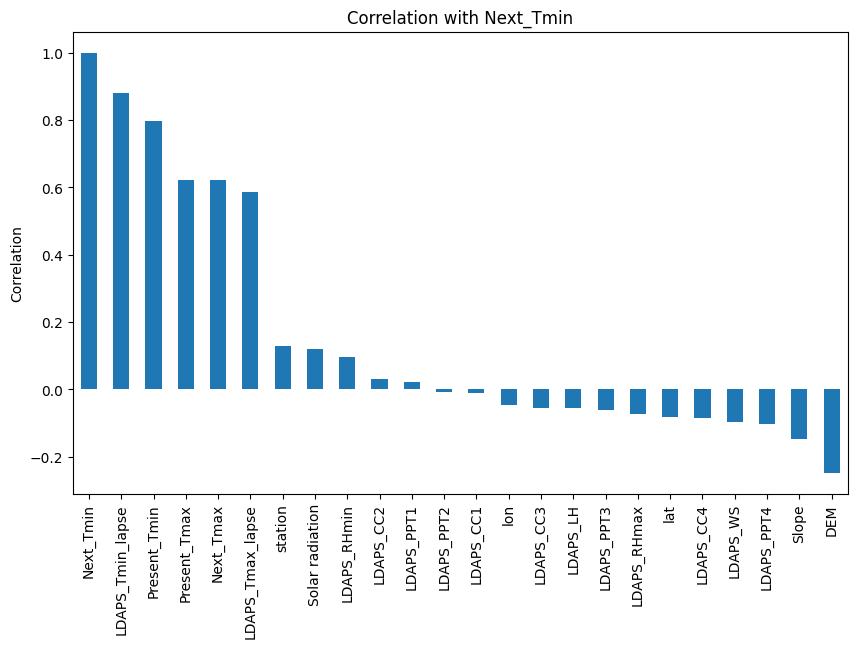

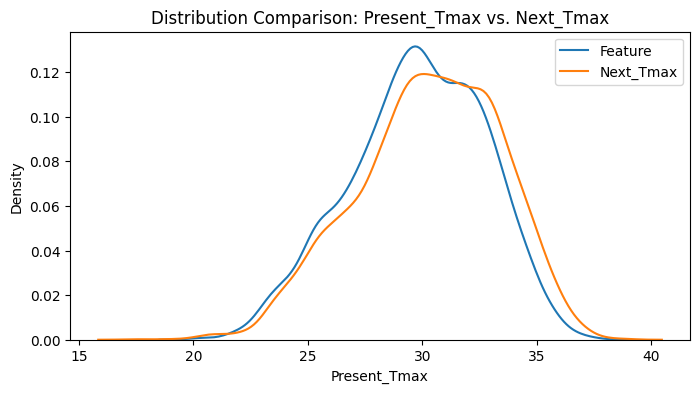

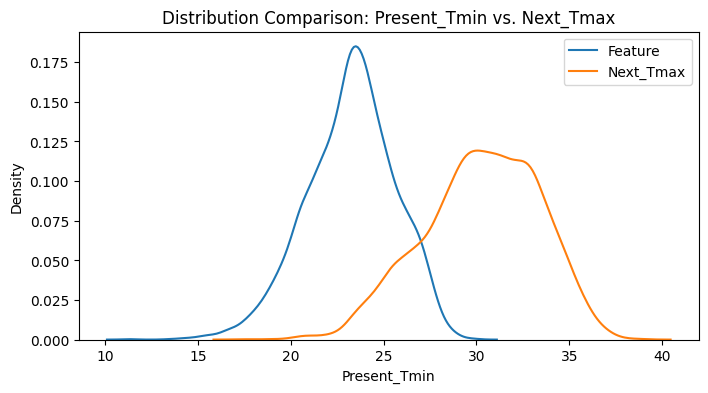

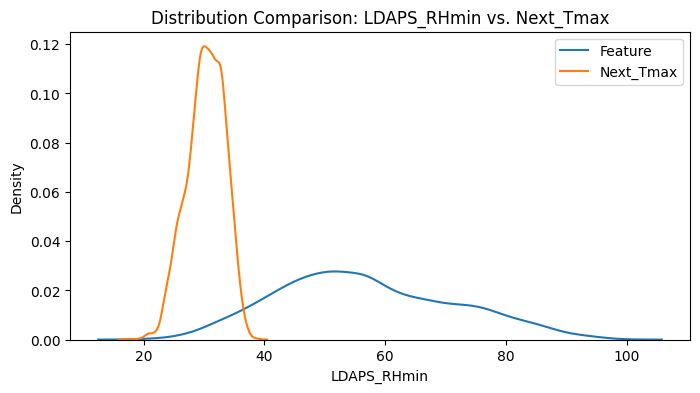

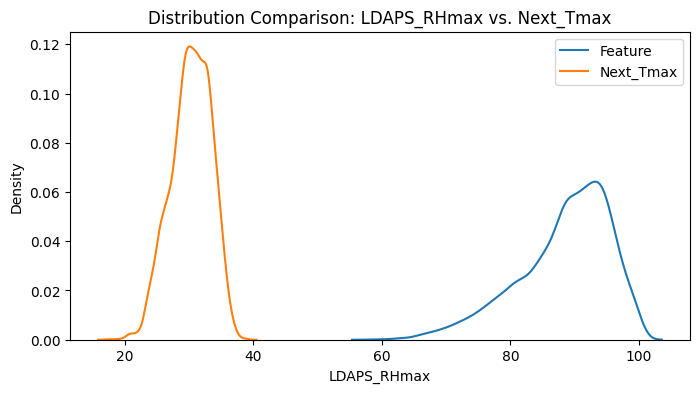

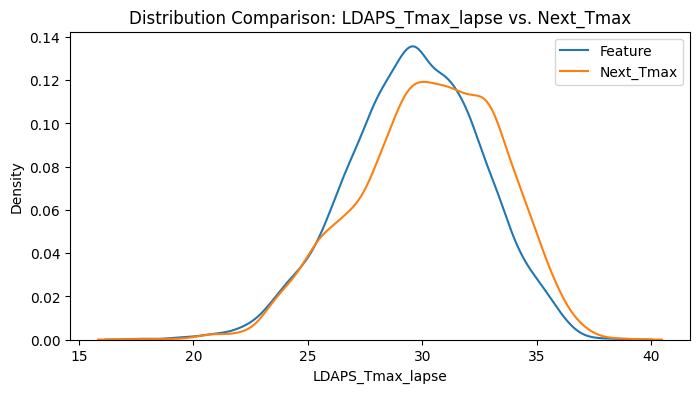

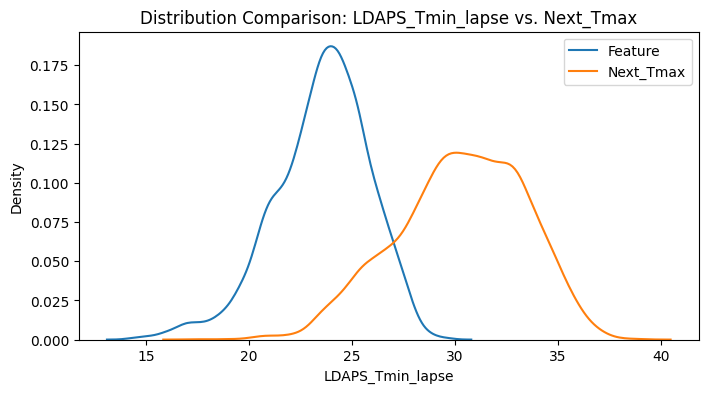

In [15]:
input_features = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
target_next_tmax = df['Next_Tmax']
target_next_tmin = df['Next_Tmin']

corr_with_target = df.corrwith(target_next_tmax).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
corr_with_target.plot(kind='bar')
plt.title("Correlation with Next_Tmax")
plt.ylabel("Correlation")
plt.show()

corr_with_target = df.corrwith(target_next_tmin).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
corr_with_target.plot(kind='bar')
plt.title("Correlation with Next_Tmin")
plt.ylabel("Correlation")
plt.show()

for feature in selected_features_for_dist:
    plt.figure(figsize=(8, 4))
    sb.kdeplot(df[feature], label="Feature")
    sb.kdeplot(target_next_tmax, label="Next_Tmax")
    plt.title(f"Distribution Comparison: {feature} vs. Next_Tmax")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

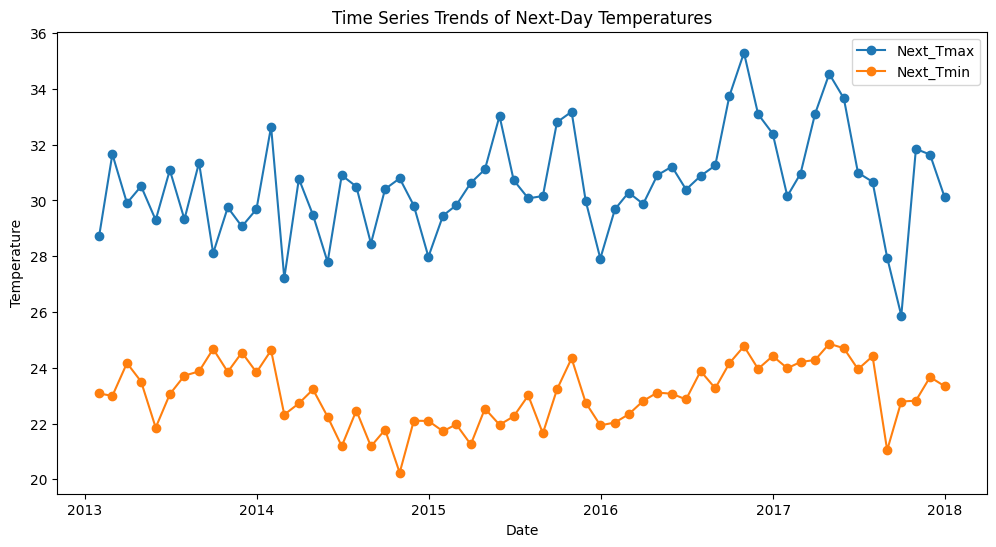

In [16]:
df.set_index('Date', inplace=True)
resampled_data = df.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(resampled_data['Next_Tmax'], label='Next_Tmax', marker='o')
plt.plot(resampled_data['Next_Tmin'], label='Next_Tmin', marker='o')
plt.title("Time Series Trends of Next-Day Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Splitting the data into test and train data

In [18]:
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(input_features, target_next_tmax, test_size=0.2, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(input_features, target_next_tmin, test_size=0.2, random_state=42)

X_train_max['Days_Since_Start'] = (X_train_max['Date'] - X_train_max['Date'].min()).dt.days
X_test_max['Days_Since_Start'] = (X_test_max['Date'] - X_test_max['Date'].min()).dt.days

X_train_max.drop(['Date'], axis=1, inplace=True)
X_test_max.drop(['Date'], axis=1, inplace=True)

X_train_min['Days_Since_Start'] = (X_train_min['Date'] - X_train_min['Date'].min()).dt.days
X_test_min['Days_Since_Start'] = (X_test_min['Date'] - X_test_min['Date'].min()).dt.days

X_train_min.drop(['Date'], axis=1, inplace=True)
X_test_min.drop(['Date'], axis=1, inplace=True)

Model Building and Evaluation

In [19]:
#Linear Regression

model_next_tmax = LinearRegression()
model_next_tmax.fit(X_train_max, y_train_max)

predictions_next_tmax = model_next_tmax.predict(X_test_max)

mae_next_tmax = mean_absolute_error(y_test_max, predictions_next_tmax)
mse_next_tmax = mean_squared_error(y_test_max, predictions_next_tmax)
r2_next_tmax = r2_score(y_test_max, predictions_next_tmax)

print("Linear Regression Model for Next_Tmax:")
print("Mean Absolute Error:", mae_next_tmax)
print("Mean Squared Error:", mse_next_tmax)
print("R-squared:", r2_next_tmax)

model_next_tmin = LinearRegression()
model_next_tmin.fit(X_train_min, y_train_min)

predictions_next_tmin = model_next_tmin.predict(X_test_min)

mae_next_tmin = mean_absolute_error(y_test_min, predictions_next_tmin)
mse_next_tmin = mean_squared_error(y_test_min, predictions_next_tmin)
r2_next_tmin = r2_score(y_test_min, predictions_next_tmin)

print("\nLinear Regression Model for Next_Tmin:")
print("Mean Absolute Error:", mae_next_tmin)
print("Mean Squared Error:", mse_next_tmin)
print("R-squared:", r2_next_tmin)

Linear Regression Model for Next_Tmax:
Mean Absolute Error: 1.1224678666575305
Mean Squared Error: 2.2385862177843676
R-squared: 0.7707980476679216

Linear Regression Model for Next_Tmin:
Mean Absolute Error: 0.7646394707024209
Mean Squared Error: 0.9631564560279507
R-squared: 0.8454409267406781


Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

model_rf_next_tmax = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_next_tmax.fit(X_train_max, y_train_max)

predictions_rf_next_tmax = model_rf_next_tmax.predict(X_test_max)

mae_rf_next_tmax = mean_absolute_error(y_test_max, predictions_rf_next_tmax)
mse_rf_next_tmax = mean_squared_error(y_test_max, predictions_rf_next_tmax)
r2_rf_next_tmax = r2_score(y_test_max, predictions_rf_next_tmax)

print("Random Forest Model for Next_Tmax:")
print("Mean Absolute Error:", mae_rf_next_tmax)
print("Mean Squared Error:", mse_rf_next_tmax)
print("R-squared:", r2_rf_next_tmax)

model_rf_next_tmin = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_next_tmin.fit(X_train_min, y_train_min)

predictions_rf_next_tmin = model_rf_next_tmin.predict(X_test_min)

mae_rf_next_tmin = mean_absolute_error(y_test_min, predictions_rf_next_tmin)
mse_rf_next_tmin = mean_squared_error(y_test_min, predictions_rf_next_tmin)
r2_rf_next_tmin = r2_score(y_test_min, predictions_rf_next_tmin)

print("\nRandom Forest Model for Next_Tmin:")
print("Mean Absolute Error:", mae_rf_next_tmin)
print("Mean Squared Error:", mse_rf_next_tmin)
print("R-squared:", r2_rf_next_tmin)

Random Forest Model for Next_Tmax:
Mean Absolute Error: 0.6821637682338771
Mean Squared Error: 0.8201218004709739
R-squared: 0.9160302532354136

Random Forest Model for Next_Tmin:
Mean Absolute Error: 0.5550746295426896
Mean Squared Error: 0.5493704762699779
R-squared: 0.9118417457964316


Gradient Boosting Regressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb_next_tmax = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb_next_tmax.fit(X_train_max, y_train_max)

predictions_gb_next_tmax = model_gb_next_tmax.predict(X_test_max)

mae_gb_next_tmax = mean_absolute_error(y_test_max, predictions_gb_next_tmax)
mse_gb_next_tmax = mean_squared_error(y_test_max, predictions_gb_next_tmax)
r2_gb_next_tmax = r2_score(y_test_max, predictions_gb_next_tmax)

print("Gradient Boosting Model for Next_Tmax:")
print("Mean Absolute Error:", mae_gb_next_tmax)
print("Mean Squared Error:", mse_gb_next_tmax)
print("R-squared:", r2_gb_next_tmax)

model_gb_next_tmin = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb_next_tmin.fit(X_train_min, y_train_min)

predictions_gb_next_tmin = model_gb_next_tmin.predict(X_test_min)

mae_gb_next_tmin = mean_absolute_error(y_test_min, predictions_gb_next_tmin)
mse_gb_next_tmin = mean_squared_error(y_test_min, predictions_gb_next_tmin)
r2_gb_next_tmin = r2_score(y_test_min, predictions_gb_next_tmin)

print("\nGradient Boosting Model for Next_Tmin:")
print("Mean Absolute Error:", mae_gb_next_tmin)
print("Mean Squared Error:", mse_gb_next_tmin)
print("R-squared:", r2_gb_next_tmin)

Gradient Boosting Model for Next_Tmax:
Mean Absolute Error: 0.8914845738472253
Mean Squared Error: 1.300648910378253
R-squared: 0.8668305615441783

Gradient Boosting Model for Next_Tmin:
Mean Absolute Error: 0.619803717676019
Mean Squared Error: 0.6302349171460131
R-squared: 0.8988653150585054


Hyperparameter Tuning using RandomizedSearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf_next_tmax = RandomForestRegressor(random_state=42)

random_search_rf = RandomizedSearchCV(estimator=model_rf_next_tmax, param_distributions=param_dist_rf,
                                      n_iter=10, scoring='neg_mean_absolute_error', cv=3, random_state=42)

random_search_rf.fit(X_train_max, y_train_max)

best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

print("Best Parameters for Random Forest:", best_params_rf)

predictions_rf_next_tmax = best_model_rf.predict(X_test_max)

mae_rf_next_tmax = mean_absolute_error(y_test_max, predictions_rf_next_tmax)
mse_rf_next_tmax = mean_squared_error(y_test_max, predictions_rf_next_tmax)
r2_rf_next_tmax = r2_score(y_test_max, predictions_rf_next_tmax)

predictions_rf_next_tmin = best_model_rf.predict(X_test_min)

mae_rf_next_tmin = mean_absolute_error(y_test_min, predictions_rf_next_tmin)
mse_rf_next_tmin = mean_squared_error(y_test_min, predictions_rf_next_tmin)
r2_rf_next_tmin = r2_score(y_test_min, predictions_rf_next_tmin)

print("Random Forest Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmax:")
print("Mean Absolute Error:", mae_rf_next_tmax)
print("Mean Squared Error:", mse_rf_next_tmax)
print("R-squared:", r2_rf_next_tmax)

print("\nRandom Forest Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmin:")
print("Mean Absolute Error:", mae_rf_next_tmin)
print("Mean Squared Error:", mse_rf_next_tmin)
print("R-squared:", r2_rf_next_tmin)

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmax:
Mean Absolute Error: 0.6840646957872303
Mean Squared Error: 0.8214764806680707
R-squared: 0.9158915516998224

Random Forest Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmin:
Mean Absolute Error: 7.292926283040907
Mean Squared Error: 58.43509661994919
R-squared: -8.377162269819415


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

param_dist_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_gb_next_tmax = GradientBoostingRegressor(random_state=42)

random_search_gb = RandomizedSearchCV(estimator=model_gb_next_tmax, param_distributions=param_dist_gb,
                                      n_iter=10, scoring='neg_mean_absolute_error', cv=3, random_state=42)

random_search_gb.fit(X_train_max, y_train_max)

best_params_gb = random_search_gb.best_params_
best_model_gb = random_search_gb.best_estimator_

print("Best Parameters for Gradient Boosting:", best_params_gb)

predictions_gb_next_tmax = best_model_gb.predict(X_test_max)

mae_gb_next_tmax = mean_absolute_error(y_test_max, predictions_gb_next_tmax)
mse_gb_next_tmax = mean_squared_error(y_test_max, predictions_gb_next_tmax)
r2_gb_next_tmax = r2_score(y_test_max, predictions_gb_next_tmax)

print("Gradient Boosting Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmax:")
print("Mean Absolute Error:", mae_gb_next_tmax)
print("Mean Squared Error:", mse_gb_next_tmax)
print("R-squared:", r2_gb_next_tmax)

predictions_gb_next_tmin = best_model_gb.predict(X_test_min)

mae_gb_next_tmin = mean_absolute_error(y_test_min, predictions_gb_next_tmin)
mse_gb_next_tmin = mean_squared_error(y_test_min, predictions_gb_next_tmin)
r2_gb_next_tmin = r2_score(y_test_min, predictions_gb_next_tmin)

print("\nGradient Boosting Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmin:")
print("Mean Absolute Error:", mae_gb_next_tmin)
print("Mean Squared Error:", mse_gb_next_tmin)
print("R-squared:", r2_gb_next_tmin)

Best Parameters for Gradient Boosting: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.2}
Gradient Boosting Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmax:
Mean Absolute Error: 0.6123683546075231
Mean Squared Error: 0.6259553641078982
R-squared: 0.9359103569983263

Gradient Boosting Model with Hyperparameter Tuning (RandomizedSearchCV) for Next_Tmin:
Mean Absolute Error: 7.315387874346428
Mean Squared Error: 59.093500325650325
R-squared: -8.48281723994061


Cross validation to check for overfitting

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_scores_tmax = cross_val_score(best_model_gb, X_train_max, y_train_max, cv=5, scoring='neg_mean_squared_error')

mean_cv_score_tmax = -np.mean(cross_val_scores_tmax)
std_cv_score_tmax = np.std(cross_val_scores_tmax)

print("Mean Cross-Validation Score for Tmax:", mean_cv_score_tmax)
print("Standard Deviation of Cross-Validation Scores for Tmax:", std_cv_score_tmax)

cross_val_scores_tmin = cross_val_score(best_model_gb, X_train_min, y_train_min, cv=5, scoring='neg_mean_squared_error')

mean_cv_score_tmin = -np.mean(cross_val_scores_tmin)
std_cv_score_tmin = np.std(cross_val_scores_tmin)

print("Mean Cross-Validation Score for Tmin:", mean_cv_score_tmin)
print("Standard Deviation of Cross-Validation Scores for Tmin:", std_cv_score_tmin)

Mean Cross-Validation Score for Tmax: 0.785229434383429
Standard Deviation of Cross-Validation Scores for Tmax: 0.030819723674805368
Mean Cross-Validation Score for Tmin: 0.43403964495642633
Standard Deviation of Cross-Validation Scores for Tmin: 0.032385004473251884


The Tmax value is performing consistently. However, Tmin is not that consistent. Hence applying regularization.

In [25]:
best_model_gb_regularized_tmin = GradientBoostingRegressor(n_estimators=150, min_samples_split=2, min_samples_leaf=2,
                                                      max_depth=4, learning_rate=0.1, subsample=0.8,
                                                      random_state=42)

best_model_gb_regularized_tmin.fit(X_train_min, y_train_min)

predictions_gb_regularized_tmin = best_model_gb_regularized_tmin.predict(X_test_min)

mae_gb_regularized = mean_absolute_error(y_test_min, predictions_gb_regularized_tmin)
mse_gb_regularized = mean_squared_error(y_test_min, predictions_gb_regularized_tmin)
r2_gb_regularized = r2_score(y_test_min, predictions_gb_regularized_tmin)

print("Gradient Boosting Model with Regularization:")
print("Mean Absolute Error:", mae_gb_regularized)
print("Mean Squared Error:", mse_gb_regularized)
print("R-squared:", r2_gb_regularized)

Gradient Boosting Model with Regularization:
Mean Absolute Error: 0.5108204441517772
Mean Squared Error: 0.4435123673906081
R-squared: 0.9288289456464475


After regularization, checking the cross validation score again

In [26]:
cross_val_scores_tmin = cross_val_score(best_model_gb_regularized_tmin, X_train_min, y_train_min, cv=5, scoring='neg_mean_squared_error')

mean_cv_score_tmin = -np.mean(cross_val_scores_tmin)
std_cv_score_tmin = np.std(cross_val_scores_tmin)

print("Mean Cross-Validation Score for Tmin:", mean_cv_score_tmin)
print("Standard Deviation of Cross-Validation Scores for Tmin:", std_cv_score_tmin)

Mean Cross-Validation Score for Tmin: 0.49021904018651846
Standard Deviation of Cross-Validation Scores for Tmin: 0.033993099069868755


Mean CV Score improved slightly. Hence, visualizing the predicitons

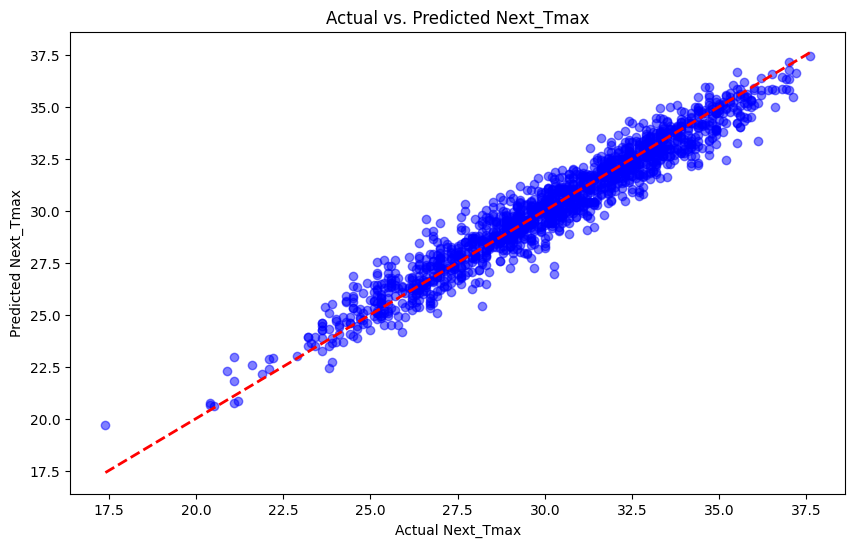

In [27]:
predictions_gb_next_tmax = best_model_gb.predict(X_test_max)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_max, predictions_gb_next_tmax, color='blue', alpha=0.5)
plt.plot([y_test_max.min(), y_test_max.max()], [y_test_max.min(), y_test_max.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Next_Tmax")
plt.ylabel("Predicted Next_Tmax")
plt.title("Actual vs. Predicted Next_Tmax")
plt.show()

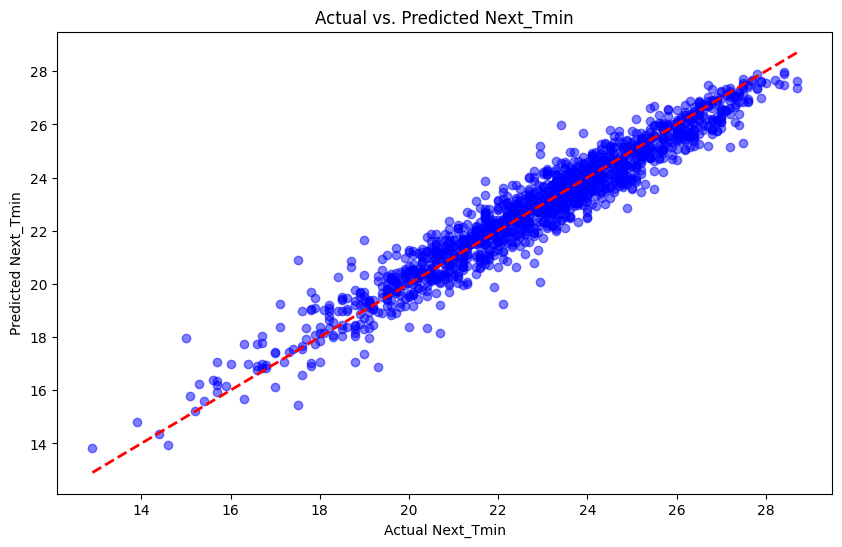

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_min, predictions_gb_regularized_tmin, color='blue', alpha=0.5)
plt.plot([y_test_min.min(), y_test_min.max()], [y_test_min.min(), y_test_min.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Next_Tmin")
plt.ylabel("Predicted Next_Tmin")
plt.title("Actual vs. Predicted Next_Tmin")
plt.show()

Loading the model

In [29]:
import joblib

joblib.dump(best_model_gb, 'best_model_gb_next_tmax.pkl')
joblib.dump(best_model_gb_regularized_tmin, 'best_model_gb_next_tmin.pkl')


['best_model_gb_next_tmin.pkl']

In [30]:
loaded_model_gb_next_tmax = joblib.load('best_model_gb_next_tmax.pkl')
loaded_model_gb_next_tmin = joblib.load('best_model_gb_next_tmin.pkl')